# Unit 5 - Financial Planning

In [50]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime

%matplotlib inline

In [51]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [52]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [53]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [54]:
# Fetch current BTC price
btc_response = requests.get(btc_url)

# Fetch current ETH price
eth_response = requests.get(eth_url)

# Compute current value of my crpto
# Parse the JSON data from the response
btc_data = btc_response.json()
# Check if the bpi key is present in the JSON data
# Get the current price of Bitcoin in US dollars
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
    
# Parse the JSON data from the response
eth_data = eth_response.json()
# Check if the bpi key is present in the JSON data

# Get the current price of Ethereum in US dollars
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
    
# Print current crypto wallet balance
my_btc_value = my_btc * btc_price

my_eth_value = my_eth * eth_price

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27752.40
The current value of your 5.3 ETH is $8403.52


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [55]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [56]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#alpaca_api_key = "PK3LYUT3FRGSEFTOVNY2"
#alpaca_secret_key = "WrwqS3BOyHtkGm65ASZbGvd833d7gF2MXxXRinT1"

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [57]:
# # Set Alpaca API key and secret
# alpaca_api_key = os.getenv('ALPACA_API_KEY')
# alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
alpaca_api_key = 'PK5S4E32R2O38VJ2XX0C'
alpaca_secret_key = 'WrwqS3BOyHtkGm65ASZbGvd833d7gF2MXxXRinT1'
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

# Format current date as ISO format
today = pd.Timestamp('2023-01-31', tz='America/New_York').isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = api.get_bars(
    tickers,
    timeframe,
    start = today
).df

df_investments

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-01-31 05:00:00+00:00,100.16,100.34,99.825,100.22,11975396,31789,100.036626,AGG
2023-01-31 05:00:00+00:00,401.13,406.53,400.770,406.48,82851477,498525,404.093709,SPY


In [58]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis=1)

#Concatenate the ticker DataFrames
df_investments = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
df_investments.head()

AGG                                    \
                             open    high     low   close    volume   
timestamp                                                             
2023-01-31 05:00:00+00:00  100.16  100.34  99.825  100.22  11975396   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2023-01-31 05:00:00+00:00       31789  100.036626  401.13  406.53  400.77   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2023-01-31 05:00:00+00:00  406.48  82851477      498525  404.093709

In [59]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments["AGG"]["close"][0])
spy_close_price = float(df_investments["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.22
Current SPY closing price: $406.48


In [60]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20324.00
The current value of your 200 AGG shares is $20044.00


### Savings Health Analysis

In [61]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,36155.921
shares,40368.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

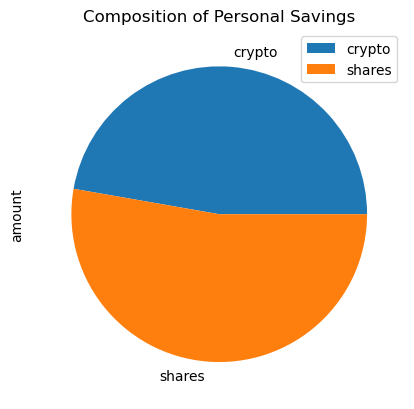

In [62]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [63]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Great! You have saved three times your monthly expenses.  Keep pushing to increase your savings.")
else:
    print(f'You are ${(emergency_fund  - total_savings):0.2f} away from your fund goal, continue saving between 10% and 20% of your monthly income to reach your goal!')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [65]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-31', tz='America/New_York').isoformat()

In [67]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

NameError: name 'alpaca' is not defined

In [68]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

NameError: name 'df_stock_data' is not defined

In [69]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

NameError: name 'MC_thirty_year' is not defined

In [70]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

NameError: name 'MC_thirty_year' is not defined

In [21]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

NameError: name 'MC_thirty_year' is not defined

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

NameError: name 'MC_thirty_year' is not defined

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

NameError: name 'MC_thirty_year' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'tbl' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'tbl' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights= [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

NameError: name 'df_stock_data' is not defined

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

NameError: name 'MC_five_year' is not defined

In [28]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()

NameError: name 'MC_five_year' is not defined

In [29]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()

NameError: name 'MC_five_year' is not defined

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

NameError: name 'MC_five_year' is not defined

In [31]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8] * initial_investment,2)
ci_upper_five = round(tbl_five[9] * initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'tbl_five' is not defined

### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights= [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

NameError: name 'df_stock_data' is not defined

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

NameError: name 'MC_ten_year' is not defined

In [34]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

NameError: name 'MC_ten_year' is not defined

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

NameError: name 'MC_ten_year' is not defined

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

NameError: name 'MC_ten_year' is not defined

In [37]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8] * initial_investment,2)
ci_upper_five = round(tbl_five[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

NameError: name 'tbl_five' is not defined